In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('AB_NYC_2019.csv')

In [18]:
print(df.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [19]:
print(df.tail())

             id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_review

In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [21]:
print(df.describe())

                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.00

In [22]:
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


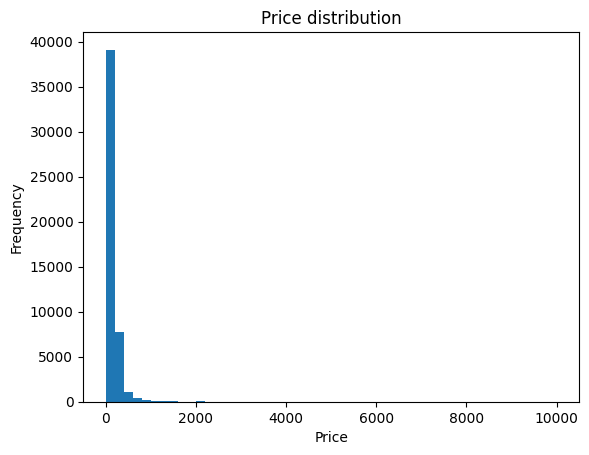

In [23]:
plt.figure()
plt.hist(df['price'], bins=50)
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

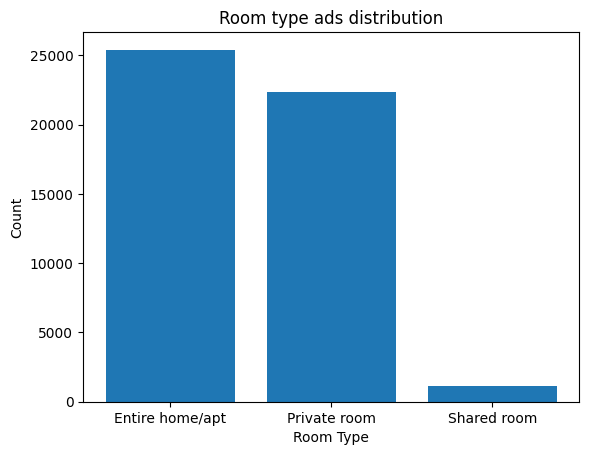

In [24]:
plt.figure()
counts = df['room_type'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Room type ads distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

In [25]:
room_types = df['room_type'].unique()
data = [df[df['room_type'] == rt]['price'] for rt in room_types]

<ipython-input-26-ef14d84ff126>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=room_types)


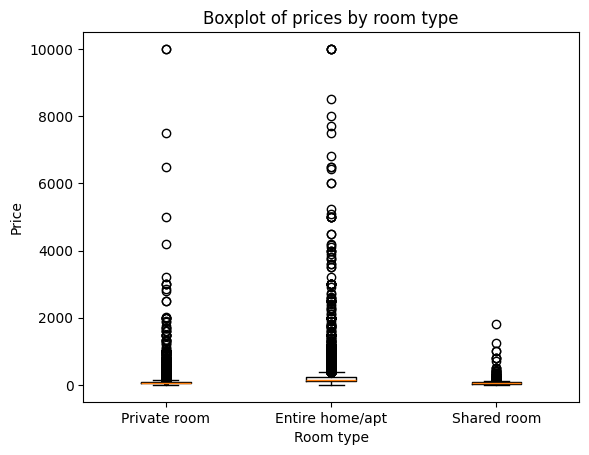

In [26]:
plt.figure()
plt.boxplot(data, labels=room_types)
plt.title('Boxplot of prices by room type')
plt.xlabel('Room type')
plt.ylabel('Price')
plt.show()

In [27]:
numeric_cols = [
    'price',
    'latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

In [28]:
corr = df[numeric_cols].corr()

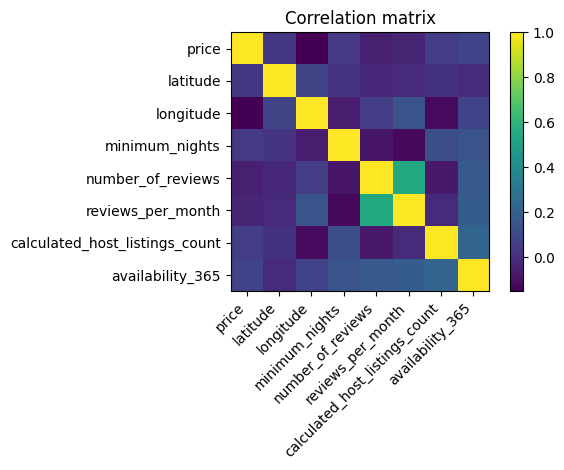

In [29]:
plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha='right')
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title('Correlation matrix')
plt.tight_layout()
plt.show()

# Data preparation

In [30]:
base = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

In [31]:
df[base].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   minimum_nights                  48895 non-null  int64  
 3   number_of_reviews               48895 non-null  int64  
 4   reviews_per_month               38843 non-null  float64
 5   calculated_host_listings_count  48895 non-null  int64  
 6   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 2.6 MB


In [32]:
df[base].isna().any()

,0
latitude,False
longitude,False
minimum_nights,False
number_of_reviews,False
reviews_per_month,True
calculated_host_listings_count,False
availability_365,False


In [33]:
df[base].isnull().sum()

,0
latitude,0
longitude,0
minimum_nights,0
number_of_reviews,0
reviews_per_month,10052
calculated_host_listings_count,0
availability_365,0


In [34]:
df['minimum_nights'].describe()

,minimum_nights
count,48895.000000
mean,7.029962
std,20.510550
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,1250.000000


In [35]:
df['minimum_nights'].median()

3.0

In [36]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test

# creates list of index and shuffles them
idx = np.arange(n)
np.random.shuffle(idx)

# shuffled dataframe
df_shuffled = df.iloc[idx]

# splits
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled[n_train+n_val:].copy()

# targets
y_train_orig = df_train.price.values
y_val_orig = df_val.price.values
y_test_orig = df_test.price.values

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

# remove targets from datasets
del df_train['price']
del df_val['price']
del df_test['price']

In [37]:
feat_mean = df_train.reviews_per_month.mean()
print(feat_mean)

1.3685492094776983


In [38]:
# option 1
#df_op1 = df_train.fillna(0)
op1 = 0

# option 2
#df_op2 = df_train.fillna(feat_mean)
op2 = feat_mean

In [39]:
def prepare_X(df, fill):
    df = df.copy()
    features = base.copy()

    df_num = df[features]

    df_num = df_num.fillna(fill)
    X = df_num.values

    return X

def train_lr_no_reg(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T @ X
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv @ X.T @ y

    return w[0], w[1:]

def rmse(y, y_pred):
    #print(f'y type: {y.dtype}')
    #print(f'y_pred type: {y_pred.dtype}')
    error = y_pred - y
    #print(error)
    mse = (error ** 2).mean()
    #print(mse)
    return np.sqrt(mse)

def predict(w0, w, X):
    return w0 + X @ w

In [40]:
X_op1 = prepare_X(df_train, op1)
w_0_op1, w_op1 = train_lr_no_reg(X_op1, y_train)

X_op2 = prepare_X(df_train, op2)
w_0_op2, w_op2 = train_lr_no_reg(X_op2, y_train)

In [41]:
#y_pred_op1 = w_0_op1 + X_op1 @ w_op1
#y_pred_op2 = w_0_op2 + X_op2 @ w_op2
y_pred_op1 = predict(w_0_op1, w_op1, X_op1)
y_pred_op2 = predict(w_0_op2, w_op2, X_op2)

In [42]:
rmse1 = rmse(y_train, y_pred_op1)
rmse2 = rmse(y_train, y_pred_op2)

print(f'RMSE option 1: {round(rmse1,2)}')
print(f'RMSE option 2: {round(rmse2,2)}')

RMSE option 1: 0.64
RMSE option 2: 0.64


In [43]:
# Eval dataset
X_val1 = prepare_X(df_val, op1)
# we don't recalculate the mean for the feature
X_val2 = prepare_X(df_val, op2)

y_val_op1 = predict(w_0_op1, w_op1, X_val1)
y_val_op2 = predict(w_0_op2, w_op2, X_val2)

rmseval1 = rmse(y_val, y_val_op1)
rmseval2 = rmse(y_val, y_val_op2)

print(f'RMSE validation option 1: {round(rmseval1, 2)}')
print(f'RMSE validation option 2: {round(rmseval2, 2)}')

RMSE validation option 1: 0.64
RMSE validation option 2: 0.64


In [44]:
# Defininig the training function with regularization
def train_lr_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T @ X
    reg = r * np.eye(XTX.shape[0])
    XTX += reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv @ X.T @ y

    return w[0], w[1:]

In [45]:
regs = np.array([0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10])

In [46]:
# we already have our prepared X with 0's; it's option 1
# sanity check: let's compute it again
X_train = prepare_X(df_train, 0)
X_val = prepare_X(df_val, 0)
#res = []
for r in regs:
    w0, w = train_lr_reg(X_train, y_train, r)
    y_pred = predict(w0, w, X_train)
    y_val_pred = predict(w0, w, X_val)
    rmse_train = rmse(y_train, y_pred)
    rmse_val = rmse(y_val, y_val_pred)
    print(f'r = {r}, RMSE train = {round(rmse_train,2)}, RMSE val = {round(rmse_val, 2)}')

r = 0.0, RMSE train = 0.64, RMSE val = 0.64
r = 1e-06, RMSE train = 0.64, RMSE val = 0.64
r = 0.0001, RMSE train = 0.64, RMSE val = 0.64
r = 0.001, RMSE train = 0.64, RMSE val = 0.64
r = 0.01, RMSE train = 0.65, RMSE val = 0.66
r = 0.1, RMSE train = 0.68, RMSE val = 0.68
r = 1.0, RMSE train = 0.68, RMSE val = 0.68
r = 5.0, RMSE train = 0.68, RMSE val = 0.68
r = 10.0, RMSE train = 0.68, RMSE val = 0.68


In [47]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [48]:
scores = []
for seed in seeds:
    np.random.seed(seed)

    # creates list of index and shuffles them
    idx = np.arange(n)
    np.random.shuffle(idx)

    # shuffled dataframe
    df_shuffled = df.iloc[idx]

    # splits
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled[n_train+n_val:].copy()

    # targets
    y_train_orig = df_train.price.values
    y_val_orig = df_val.price.values
    y_test_orig = df_test.price.values

    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)

    # remove targets from datasets
    del df_train['price']
    del df_val['price']
    del df_test['price']

    # getting ready to train
    X_train = prepare_X(df_train, 0)
    w0, w = train_lr_no_reg(X_train, y_train)

    X_val = prepare_X(df_val, 0)
    y_pred = predict(w0, w, X_val)

    error = rmse(y_val, y_pred)

    scores.append(error)

scores = np.array(scores)
std = np.std(scores)
print(f'RMSE standard deviation: {round(std, 3)}')

RMSE standard deviation: 0.008


In [49]:
np.random.seed(9)

# creates list of index and shuffles them
idx = np.arange(n)
np.random.shuffle(idx)

#shuffled dataframe
df_shuffled = df.iloc[idx]

# splits
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled[n_train+n_val:].copy()

# targets
y_train_orig = df_train.price.values
y_val_orig = df_val.price.values
y_test_orig = df_test.price.values

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

# remove targets from datasets
del df_train['price']
del df_val['price']
del df_test['price']

# combine datasets
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = np.concatenate([y_train, y_val])

# getting ready to train
X_full_train = prepare_X(df_full_train, 0)
w0, w = train_lr_reg(X_full_train, y_full_train, 0.001)

# predict and error
X_test = prepare_X(df_test, 0)
y_pred = predict(w0, w, X_test)

error = rmse(y_test, y_pred)

print(f'RMSE on full train dataset: {round(error, 2)}')

RMSE on full train dataset: 0.65
